<a href="https://colab.research.google.com/github/ishan05sharma/prediction-using-regression/blob/main/(EDA)Prediction_Project_using_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Understanding
- Forecasting Transactions
- Likely regression
- Data for 3 years
- Told data quality is okay 

-----------------------------------------

# Data Understanding

In [ ]:
import pandas as pd
url = "https://github.com/nicknochnack/ScikitLearnRegression/blob/master/regression.csv?raw=true"
df = pd.read_csv(url)
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [ ]:
df.columns

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description',
       'Account Type', 'Amount'],
      dtype='object')

In [ ]:
for col in df.columns:
  print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [ ]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [ ]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

#VISUALIZE DATA

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Account type violinplot')

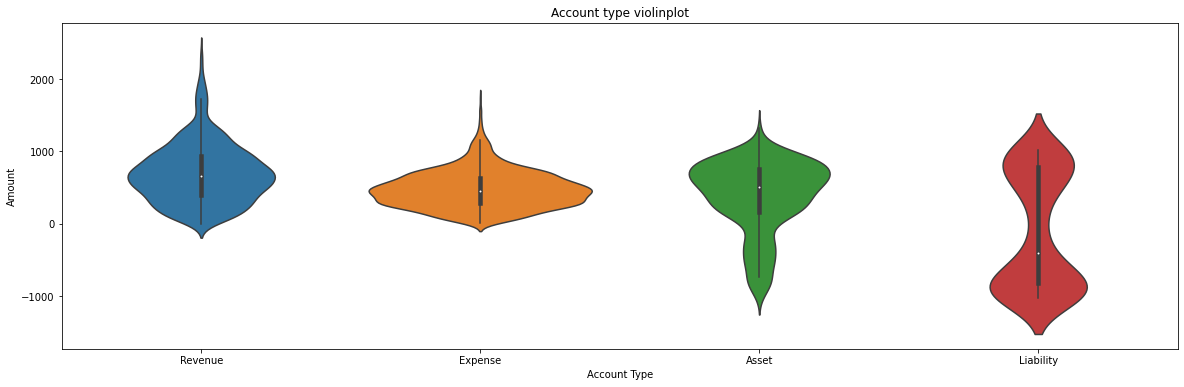

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x="Account Type", y="Amount", data=df ).set_title("Account type violinplot")

Text(0.5, 1.0, 'Account type violinplot')

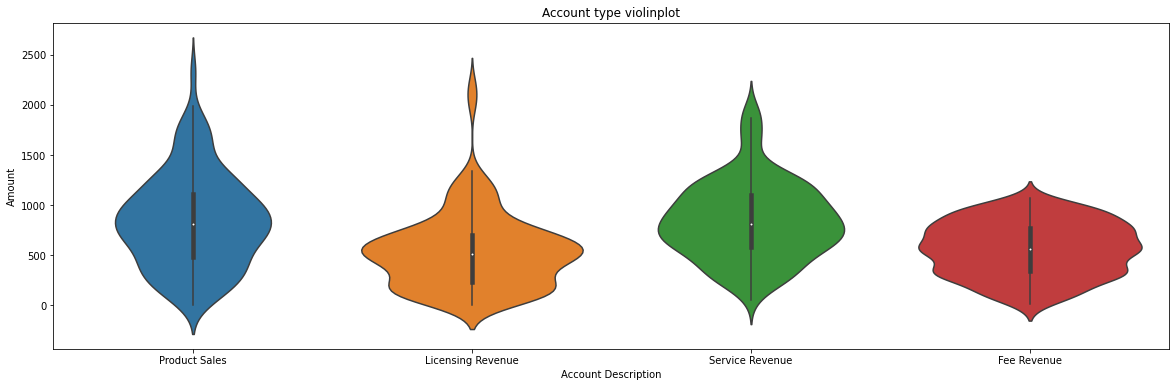

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x="Account Description", y="Amount", data=df[df['Account Type']=="Revenue"]).set_title("Account type violinplot")

In [ ]:
monthmap = {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' : 3,
    'Apr' : 4,
    'May' : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Aug" : 8,
    "Sep" : 9,
    "Oct" : 10,
    "Nov" : 11,
    "Dec" : 12
}

In [ ]:
monthmap['Jan']

1

In [ ]:

df["Period"] = df['Month'].apply(lambda x: monthmap[x])

In [ ]:
df[df['Month']=='Nov'].tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
4090,2021,Nov,CC302,2000005,Purchases,Expense,359.189,11
4091,2021,Nov,CC302,3000000,Cash at Bank,Asset,-479.672,11
4092,2021,Nov,CC302,3000001,Inventory,Asset,651.428,11
4093,2021,Nov,CC302,3000002,Accounts Receivable,Asset,174.467,11
4094,2021,Nov,CC302,4000001,Accounts Payable,Liability,-1020.000,11


In [ ]:
df["Day"] = 1

In [ ]:
df[df["Day"]==1].head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1


In [ ]:
df["Date"] = df['Year'].astype(str) + '-' + df['Period'].astype(str)+ '-' + df['Day'].astype(str)

In [ ]:
df['Date'] = pd.to_datetime(df["Date"])
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

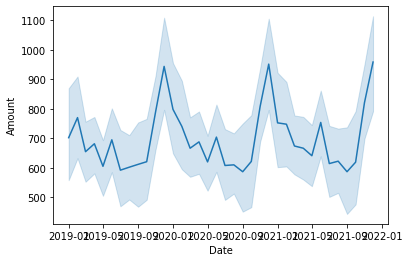

In [ ]:
sns.lineplot(x = "Date", y = "Amount", data = df[df["Account Type"]=="Revenue"])

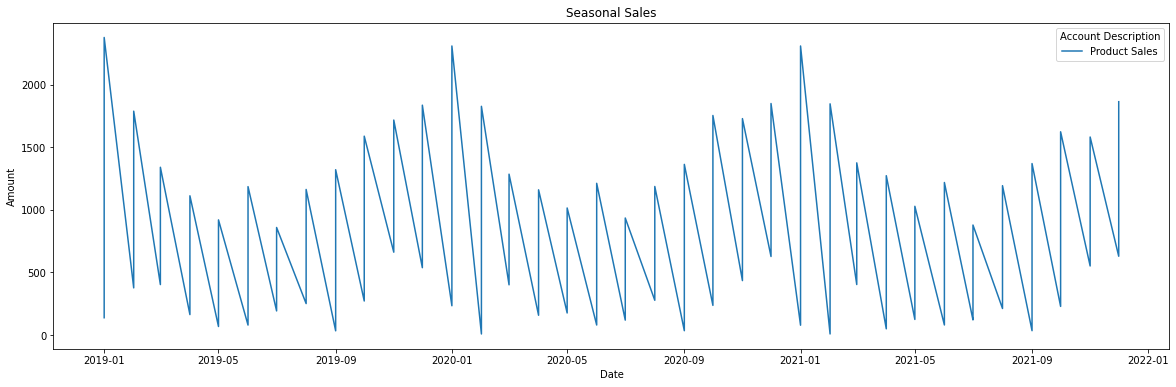

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x = "Date", y = "Amount", hue = "Account Description", estimator = None, data = df[df["Account Description"]=="Product Sales"]).set_title("Seasonal Sales")
plt.show()

CORRELATION

In [ ]:
df.corr()

,Year,Account,Amount,Period,Day
Year,1.000000e+00,1.477157e-19,0.014750,0.000000e+00,NaN
Account,1.477157e-19,1.000000e+00,-0.417946,-4.192615e-19,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,0.000000e+00,-4.192615e-19,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [ ]:
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,0,0,0,0,0,0,1,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,1,0,0,0
4209,0,0,0,0,0,0,0,0,0,0,1,0,0
4210,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
  corrdict[key] = {int(row['Account']): row['Amount']}

In [ ]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)
corrdf

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1344.051,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
1,0.000,480.968,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
2,0.000,0.000,650.82,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
3,0.000,0.000,0.00,339.36,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
4,0.000,0.000,0.00,0.00,1125.328,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,698.121,0.000,0.000,0.00,0.0
4208,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,-282.056,0.000,0.00,0.0
4209,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,537.478,0.00,0.0
4210,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,1152.68,0.0


Text(0.5, 1.0, 'Account Correlation')

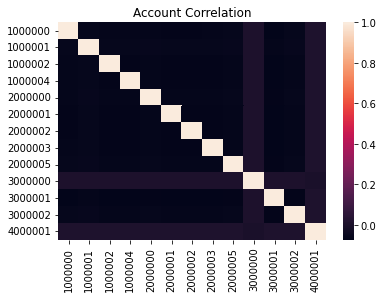

In [ ]:
sns.heatmap(corrdf.corr()).set_title('Account Correlation')

In [ ]:
df[df["Account"]==3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


# 3. DATA PREPERATION

In [ ]:
import numpy as np

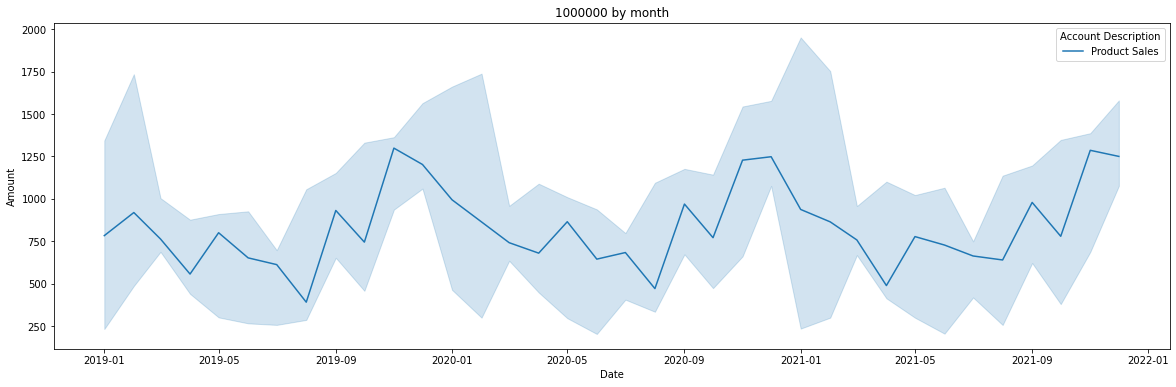

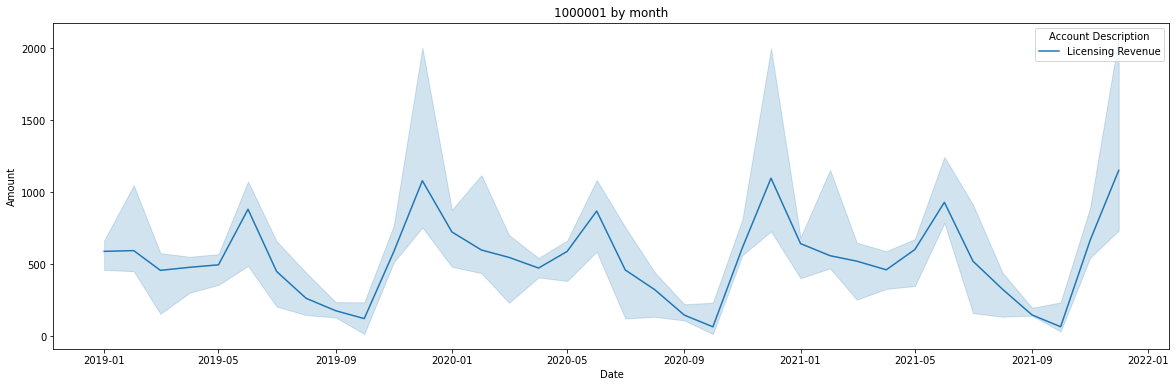

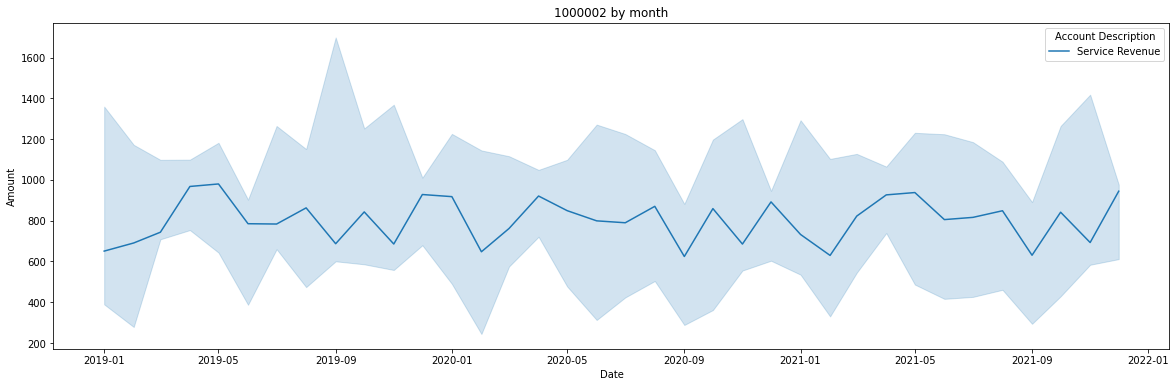

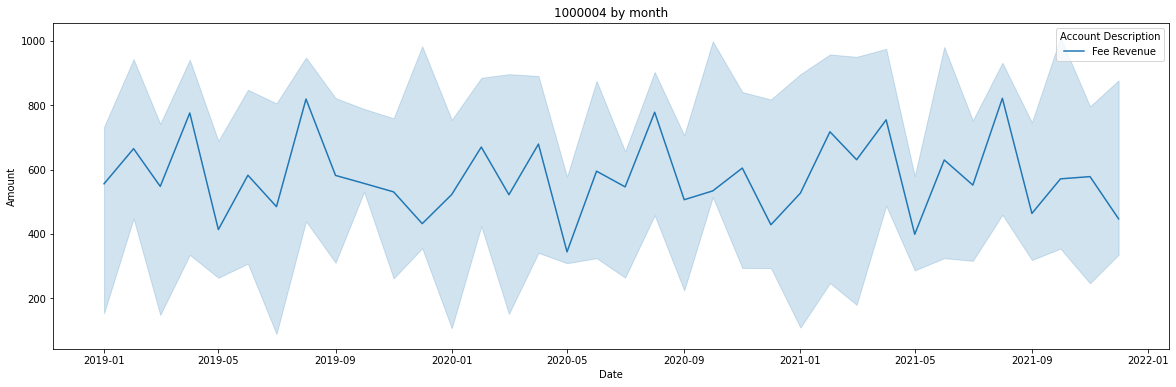

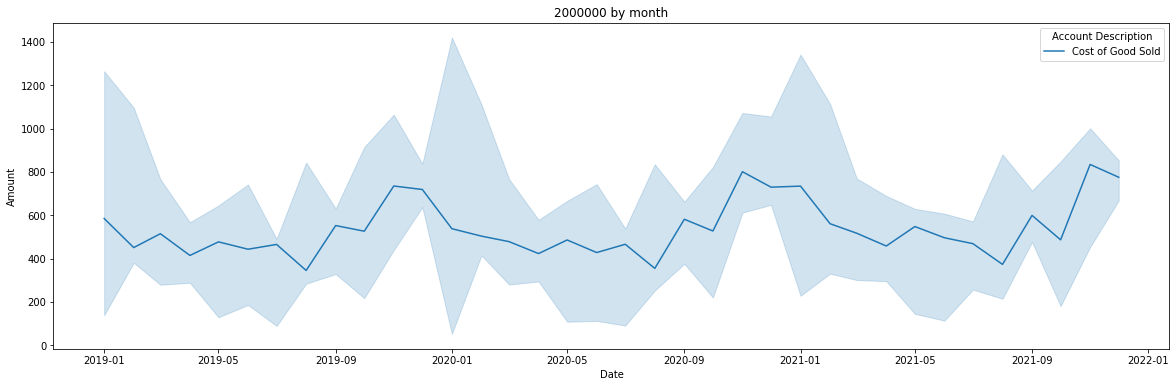

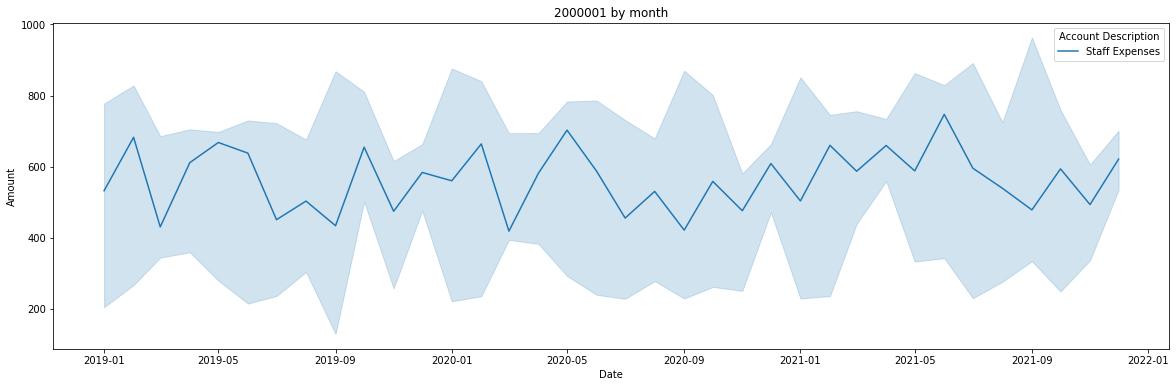

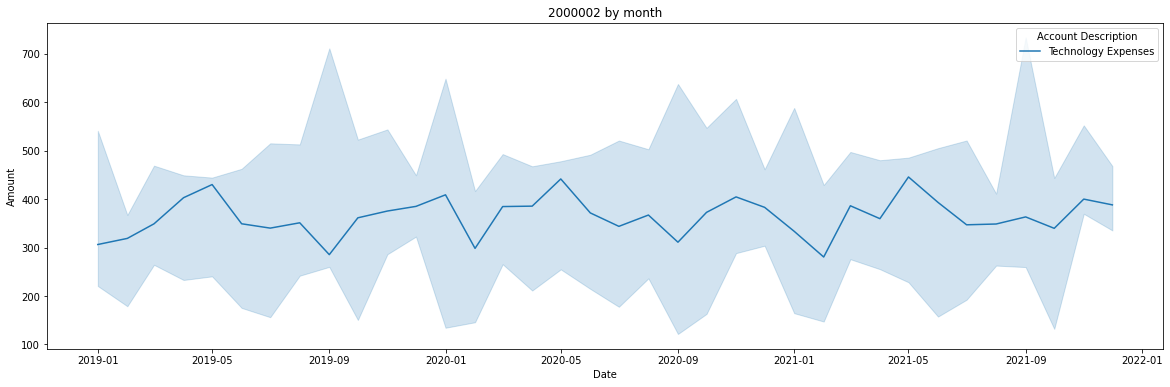

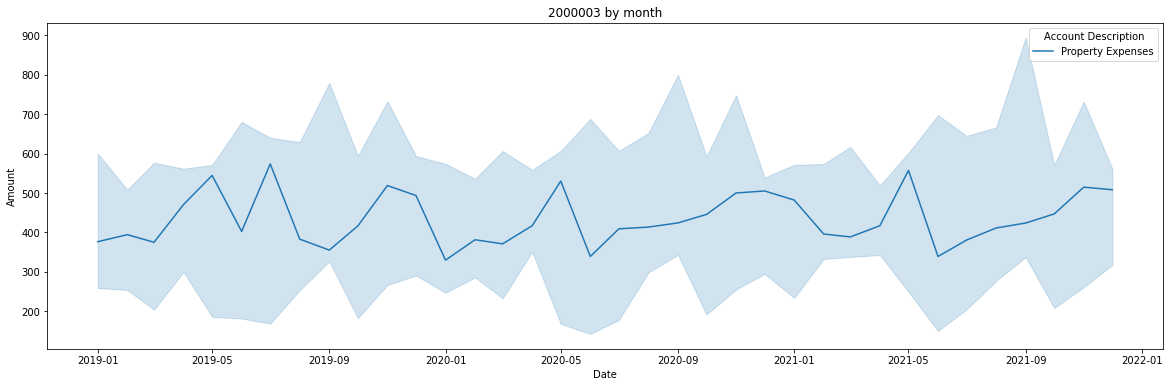

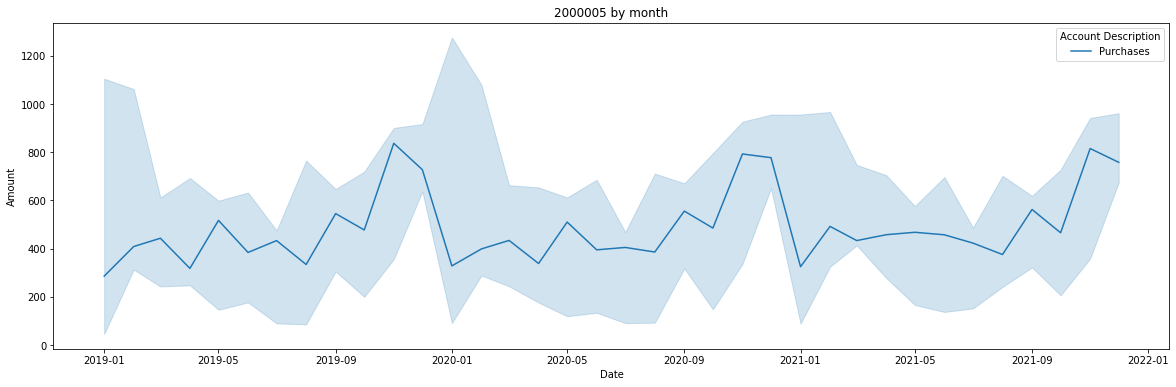

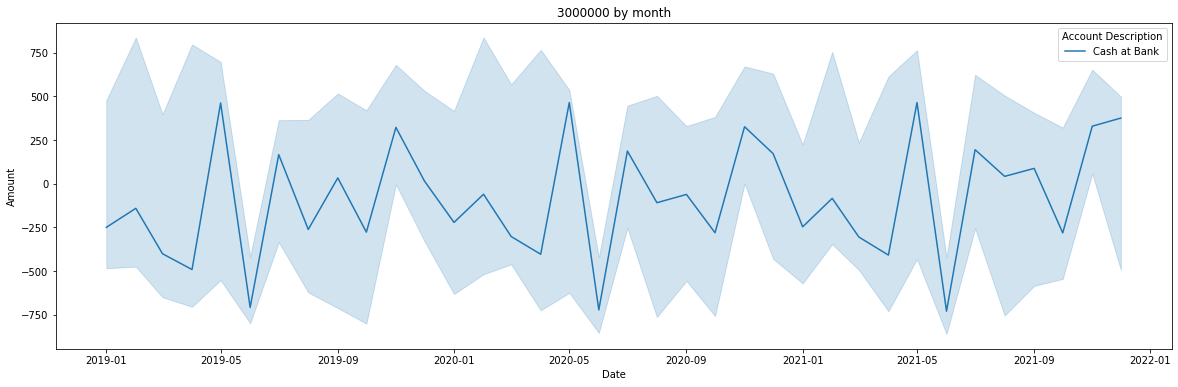

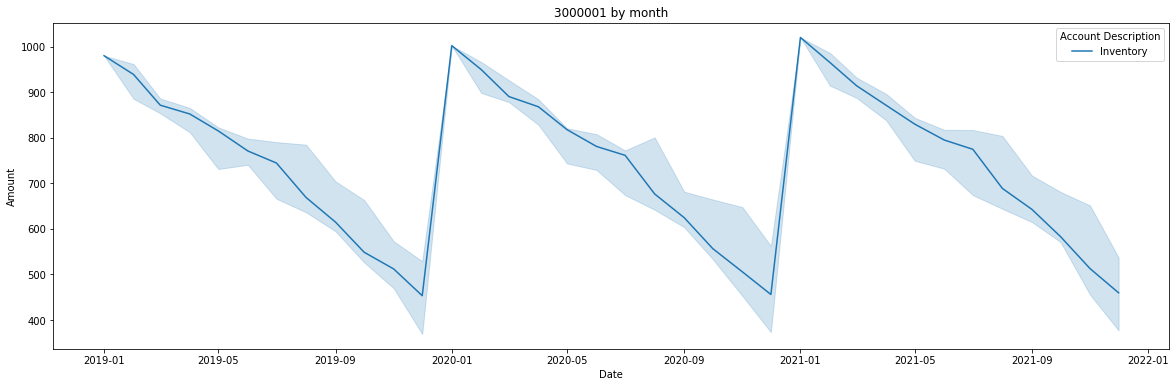

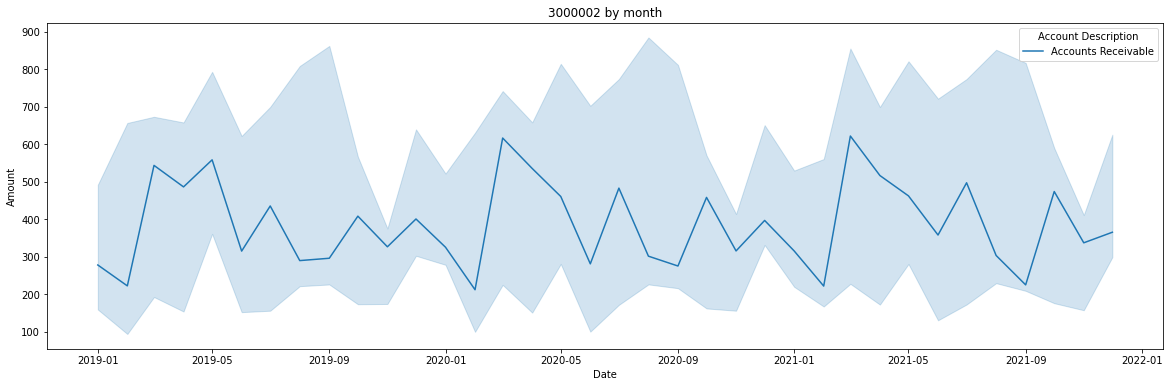

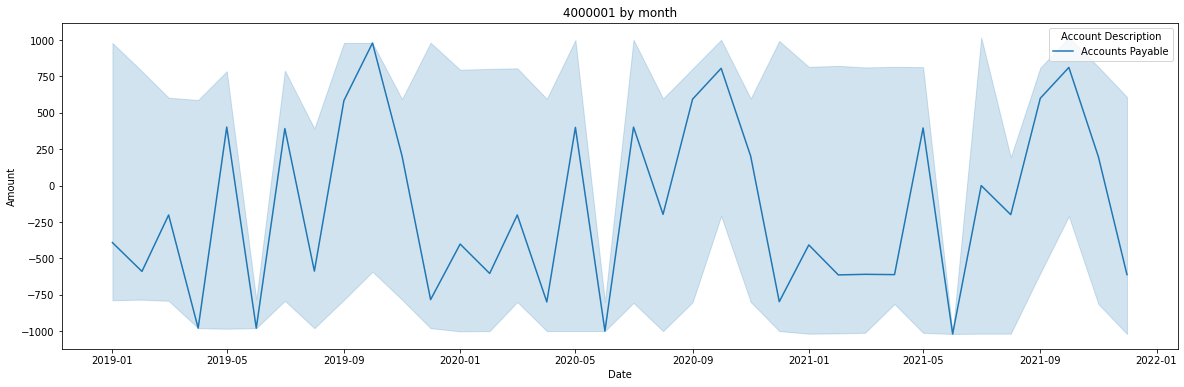

In [ ]:
for account in df['Account'].unique():
  plt.figure(figsize = (20,6))
  sns.lineplot(x = 'Date', y = 'Amount',hue = 'Account Description', estimator = np.median, data = df[df['Account']==account]).set_title('{} by month'.format(account))
  plt.show()

In [ ]:
 df = df[df['Account']!=3000001] 

In [ ]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000002, 4000001])

Convert Fields to Correct Data Types

In [ ]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [ ]:
df['Account'] = 'ACC' + df['Account'].astype(str)

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [ ]:
df['Year'] = df['Year'].astype(str)

In [ ]:
df.dtypes

Year                           object
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

DROP ANALYSIS FIELDS - unnecessary

In [ ]:
df.drop(['Period', 'Day', 'Date'], axis = 1, inplace = True)

In [ ]:
df.dtypes

Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [ ]:
if(len(df['Account'].unique())==len(df['Account Description'].unique())):
  print("Num of account and account desc is same")

Num of account and account desc is same


In [ ]:
df.drop(['Account Description'], inplace = True, axis = 1)

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328


One Hot Encoding

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Cost Centre_CC100,Cost Centre_CC101,Cost Centre_CC102,Cost Centre_CC200,Cost Centre_CC201,Cost Centre_CC202,Cost Centre_CC300,Cost Centre_CC301,Cost Centre_CC302,Account_ACC1000000,Account_ACC1000001,Account_ACC1000002,Account_ACC1000004,Account_ACC2000000,Account_ACC2000001,Account_ACC2000002,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4206,540.060,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4207,698.121,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4208,-282.056,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4210,1152.680,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


# 4. MODELLING

In [ ]:
x = df.drop('Amount', axis=1)
y = df['Amount']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1234)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2721, 40) (1167, 40) (2721,) (1167,)


Import Dependencies

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
pipelines = {
    'rf': make_pipeline(RandomForestRegressor(random_state = 1234)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge': make_pipeline(Ridge(random_state = 1234)),
    'lasso': make_pipeline(Lasso(random_state=1234)),
    'enet': make_pipeline(ElasticNet(random_state =1234))
}

In [ ]:
RandomForestRegressor().get_params()

In [ ]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
fit_models = {}
for algo, pipeline in pipelines.items():
  model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
  try:
    print('Starting training as {}'.format(algo))
    model.fit(x_train, y_train)
    fit_models[algo] = model
    print('{} has been successfuly fit'.format(algo))
  except NotFittedError as e:
    print(repr(e))

Starting training as rf
rf has been successfuly fit
Starting training as gb
gb has been successfuly fit
Starting training as ridge
ridge has been successfuly fit
Starting training as lasso
lasso has been successfuly fit
Starting training as enet
enet has been successfuly fit


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
for algo,model in fit_models.items():
  yhat = model.predict(x_test)
  print("{} scores - R2:{} MAE: {}". format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.8207591779581012 MAE: 141.95890973436158
gb scores - R2:0.48985168340175467 MAE: 263.10354134137725
ridge scores - R2:0.36130322961528194 MAE: 296.5759816944058
lasso scores - R2:0.3597764955615558 MAE: 296.804892767996
enet scores - R2:0.3610886530527241 MAE: 296.9010224274051


In [ ]:
best_model = fit_models['rf']

In [ ]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 51 kB 401 kB/s 
     |████████████████████████████████| 824 kB 39.4 MB/s 
     |████████████████████████████████| 133 kB 44.5 MB/s 
     |████████████████████████████████| 547 kB 46.0 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72564 sha256=5e61c51584d46ff10e132e0de1937990c5729d5dd703631f09bb238b8bd993f4
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=3a4bd66395f50d16d660e3cfb840103204de1160531aa2a9227e8bb7f563a9cf
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_sdk_s3transfer-2.7.0-py2.py3-none-any.whl size=88619 sha256=f07089819003d24dcbcde6451e535c07d8159c3

In [ ]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np